#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [11]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [12]:
## Reading the image plaksha_Faculty.jpg
img= cv2.imread("Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "Face Detection"              # The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX     # Font type
font_scale = 0.7                    # Font scale factor (size of text)
font_color = (0, 0, 255)            # Red color in BGR (NOT RGB!)
font_thickness = 2                  # Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

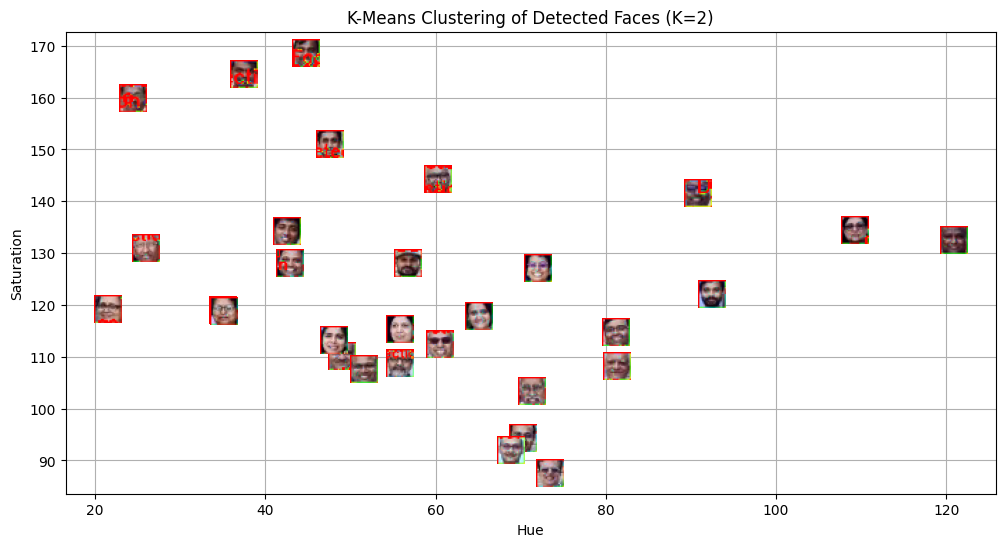

In [13]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
## Put y label
## Put title
## Put grid
## show the plot
# X label
plt.xlabel("Hue")

# Y label
plt.ylabel("Saturation")

# Title
plt.title("K-Means Clustering of Detected Faces (K=2)")

# Grid
plt.grid(True)

# Show plot
plt.show()

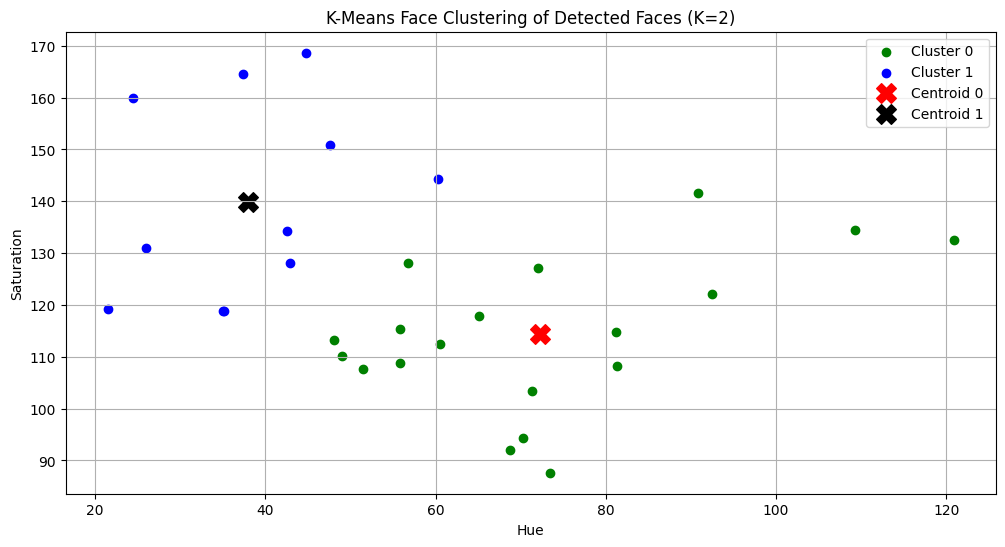

In [14]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 =  np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1')

# x label
plt.xlabel("Hue")

# y label
plt.ylabel("Saturation")

# title
plt.title("K-Means Face Clustering of Detected Faces (K=2)")

# legend
plt.legend()

# grid
plt.grid(True)

# show plot
plt.show()


In [15]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template Image face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

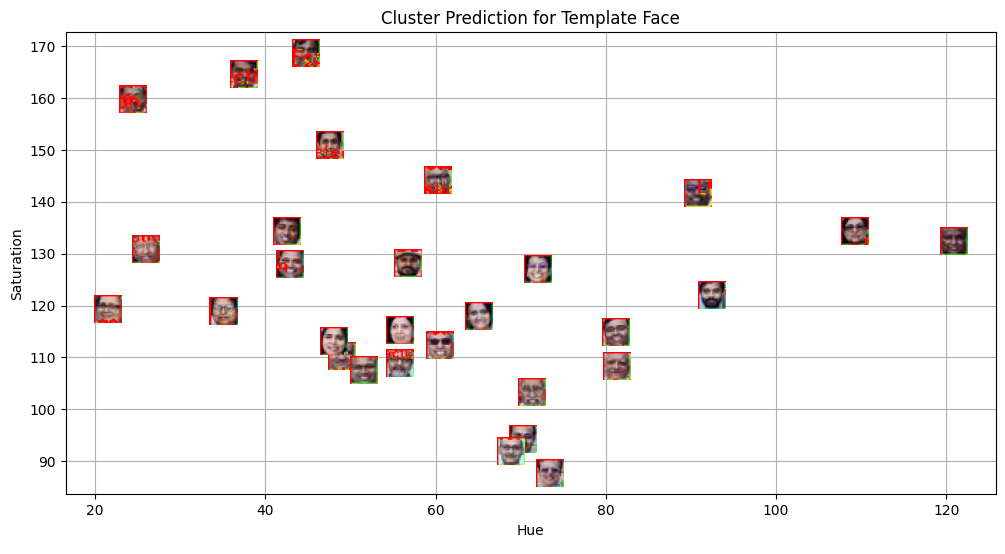

In [16]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
(x, y, w, h) = template_faces[0]
template_face = template_hsv[y:y+h, x:x+w]

template_hue = np.mean(template_face[:, :, 0])
template_saturation = np.mean(template_face[:, :, 1])


# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Prediction for Template Face")
plt.grid(True)
plt.show()

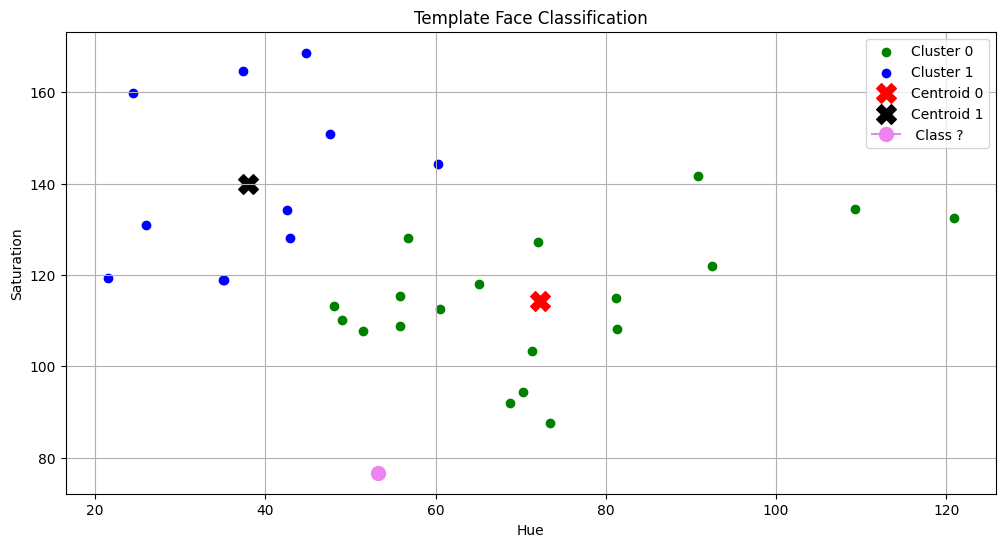

In [17]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0')   ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=200, label='Centroid 1') ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Face Classification")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Some common distance metrics include euclidean distance, manhattan distance, chebyshev distance and mahalamobis distace.

#### 2. What are some real-world applications of distance-based classification algorithms? 

Customer Behavior Prediction

Distance-based classification is used by companies to predict how a customer will behave based on similarity to past customers. Each customer is represented as a set of features such as age, purchase history, browsing time, and spending amount. When a new customer visits an online store, the system measures how “close” their data is to previous customers in feature space. If they are closest to customers who usually buy a product or respond to discounts, the system predicts similar behavior and shows personalized recommendations or offers. This helps businesses target marketing more effectively.

Document Classification

In document classification, a distance-based algorithm categorizes a new document by comparing it to previously labeled documents. Each document is converted into a numerical vector based on word frequencies (for example using a bag-of-words model). When a new email or article arrives, the algorithm calculates the distance between its vector and existing document vectors. If it is closest to documents labeled “spam,” it is classified as spam; if closest to “sports” or “news,” it is assigned that category. This approach is commonly used in email spam filtering and automatic news article categorization.

#### 3. Explain various distance metrics. 

Euclidean Distance- Represents the shortest distance between two vectors. Formula is given by d(x,y) = sqrt( Σ (xi − yi)^2 ),  i = 1 to n

Manhattan Distance- Distance between two points measured along axes at right angles. Formula is fiven by d(x,y) = Σ |xi − yi|,  i = 1 to n

Mahalanobis Distance- Takes into account correlation between variables and the data variance. Formula is given by d(x,y) = sqrt( (x − y)^T  S^(-1)  (x − y) ) where S is Covariance Matrix of Dataset

Chebyshev Distance- It is defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension. Formula is given by d(x,y) = max |xi − yi|


#### 4. What is the role of cross validation in model performance? 
Cross-Validation is important to test the accuracy of the model in the training dataset, based on which only it can be deployed in the outside world.

#### 5. Explain variance and bias in terms of KNN? 
If value  of K in KNN is two low, it may be noisy since the neraby outliers affect the classification of data-points leading to new data points being assigned classes, such that they exhibit high variance. However if K is too large, KNN may always assign data-points to the majority class thus creating high bias towards majority class.